## Data Exploration

### Where Data come from?

This dataset is available on Kaggle, which is where our group sourced the data (https://www.kaggle.com/datasets/taweilo/mba-admission-dataset). However, the data is sourced from Wharton’s cohort profile for the Class of 2025 (https://mba.wharton.upenn.edu/class-profile/)

### What is the data about?

The dataset includes details on applicants to Wharton’s MBA program, with variables such as gender, international status, GPA, undergraduate major, race, GMAT score, years of work experience, industry, and admission status.

### When it was collected, and over what time period

The data was collected for the 2025 admissions class to UPenn’s Wharton Business School.

### How many rows and columns

6,194 Rows and 10 Columns.

### What are the types of the columns

application_id: Integer (unique identifier for each application)
gender: Object (gender of the applicant)
international: Boolean (whether the applicant is an international student)
gpa: Float (undergraduate GPA of the applicant)
major: Object (applicant's undergraduate major)
race: Object (applicant’s race)
gmat: Float (GMAT score)
work_exp: Float (years of work experience)
work_industry: Object (industry of the applicant’s work experience)
admission: Object (admission result)

### Read data and analyze data

In [45]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

#Ensemple

# Random Forest
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

%matplotlib inline

In [16]:
# Read in data

url = 'https://raw.githubusercontent.com/toutsos/ml_project/refs/heads/main/MBA.csv'
df=pd.read_csv(url)


In [17]:
print(df.head(1))

   application_id  gender  international  gpa     major   race   gmat  \
0               1  Female          False  3.3  Business  Asian  620.0   

   work_exp       work_industry admission  
0       3.0  Financial Services     Admit  


In [18]:
print(df.describe())

       application_id          gpa         gmat     work_exp
count     6194.000000  6194.000000  6194.000000  6194.000000
mean      3097.500000     3.250714   651.092993     5.016952
std       1788.198115     0.151541    49.294883     1.032432
min          1.000000     2.650000   570.000000     1.000000
25%       1549.250000     3.150000   610.000000     4.000000
50%       3097.500000     3.250000   650.000000     5.000000
75%       4645.750000     3.350000   680.000000     6.000000
max       6194.000000     3.770000   780.000000     9.000000


In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB
None


We see that after running ```df.info()``` there are features with ```Dtype = object``` that we must take care of.  

In [20]:
# Identify columns with object dtype
object_columns = df.select_dtypes(include=['object']).columns

print("Object columns:", object_columns)

df.describe(include=['object'])

Object columns: Index(['gender', 'major', 'race', 'work_industry', 'admission'], dtype='object')


,gender,major,race,work_industry,admission
count,6194,6194,4352,6194,1000
unique,2,3,5,14,2
top,Male,Humanities,White,Consulting,Admit
freq,3943,2481,1456,1619,900


## Data exploration and visualization

### Various plots that are appropiate for the data.

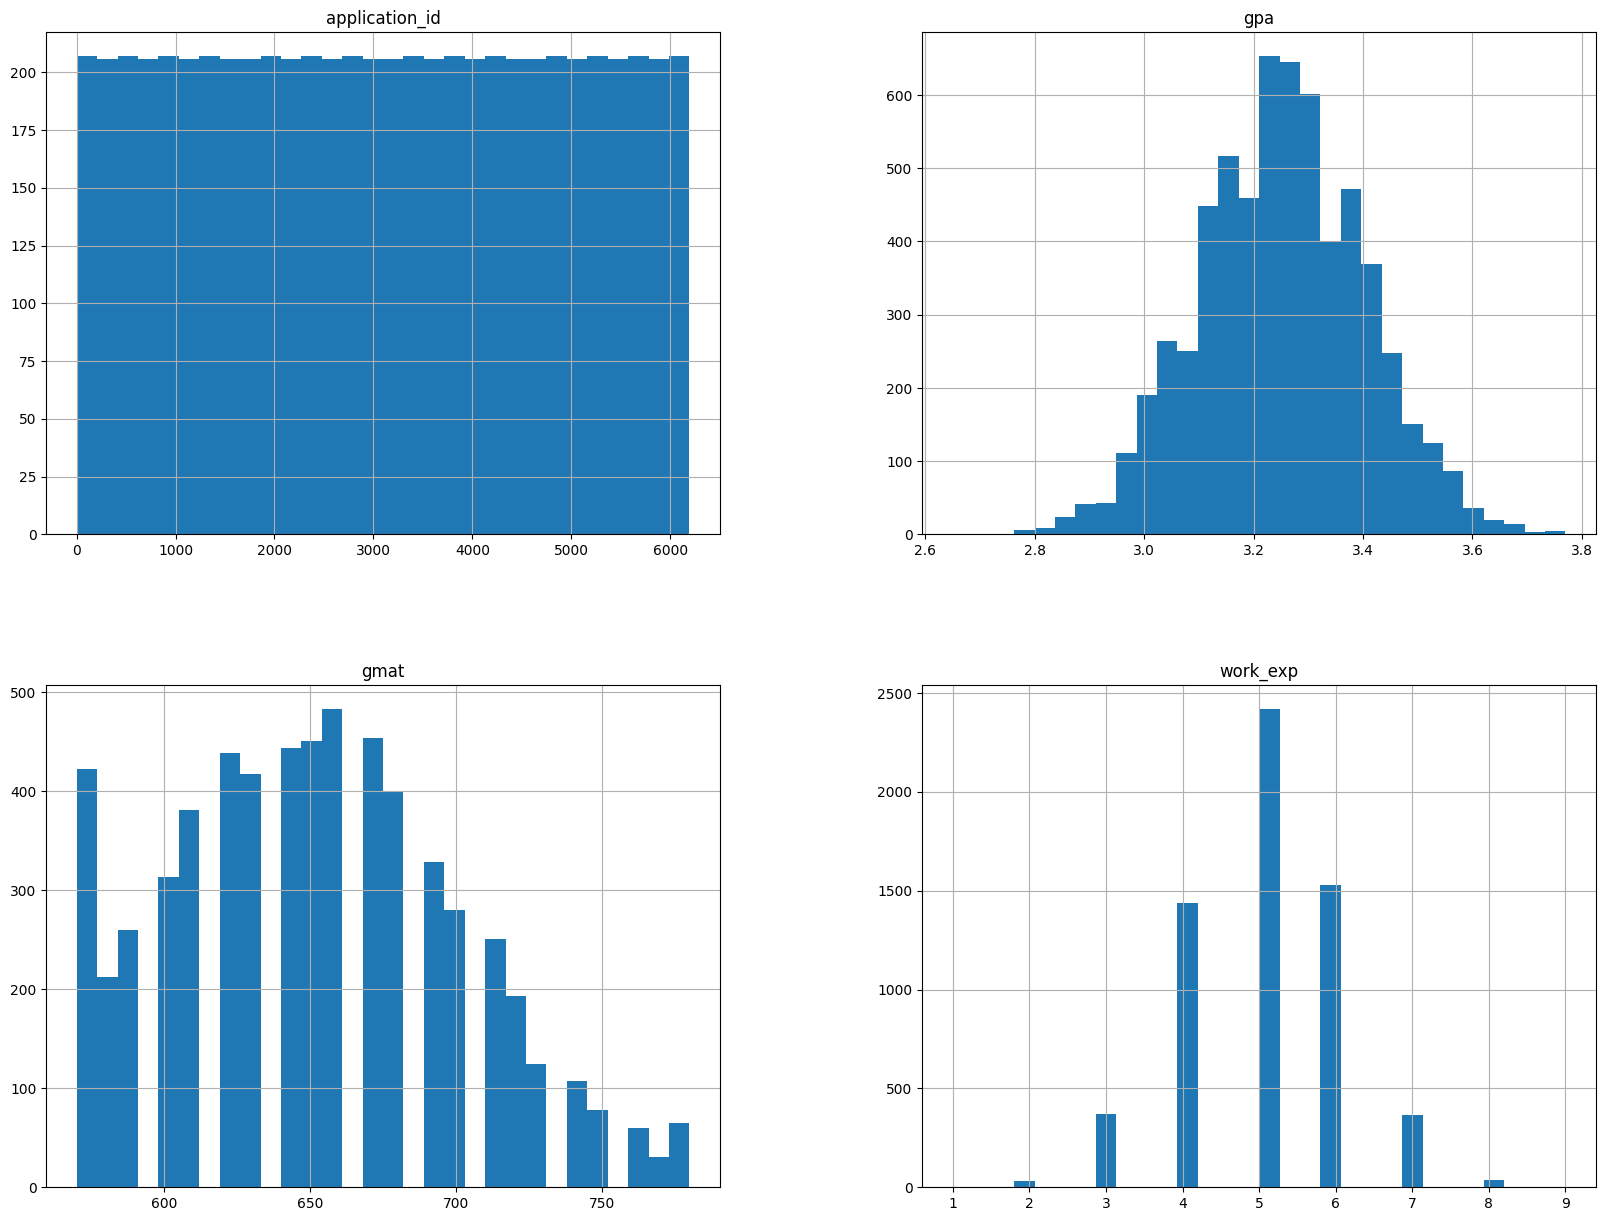

In [21]:
df.hist(bins=30, figsize=(20,15))
plt.show()

Histograms ploted only for numerical values, thats it GPA, GMAT, Work_exp and Application Id.

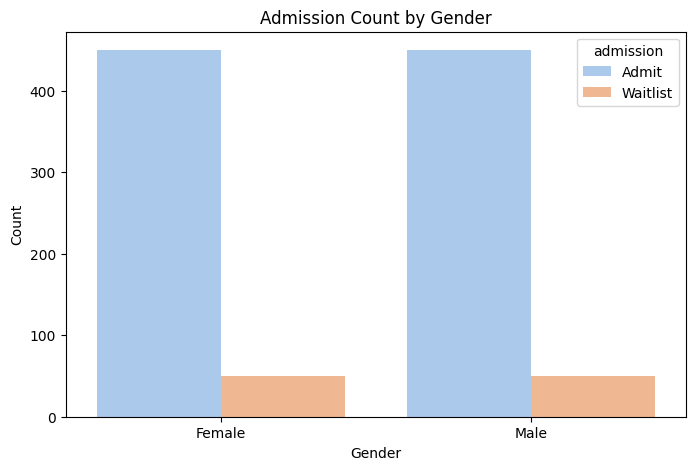

In [22]:
# Admissions based on gender

plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='admission', data=df, palette='pastel')
plt.title('Admission Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [23]:
# Prepare the admission feature for the following graphs.
df['admission'] = df['admission'].map({'Admit': 1,'Waitlist': 2 }).fillna(0)
df['admission'].value_counts()

,count
admission,
0.0,5194
1.0,900
2.0,100


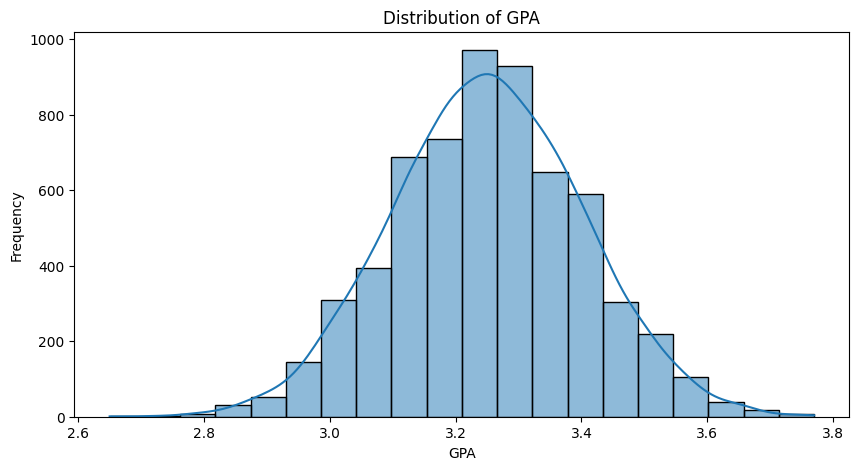

In [24]:
# GPA Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['gpa'], kde=True, bins=20)
plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

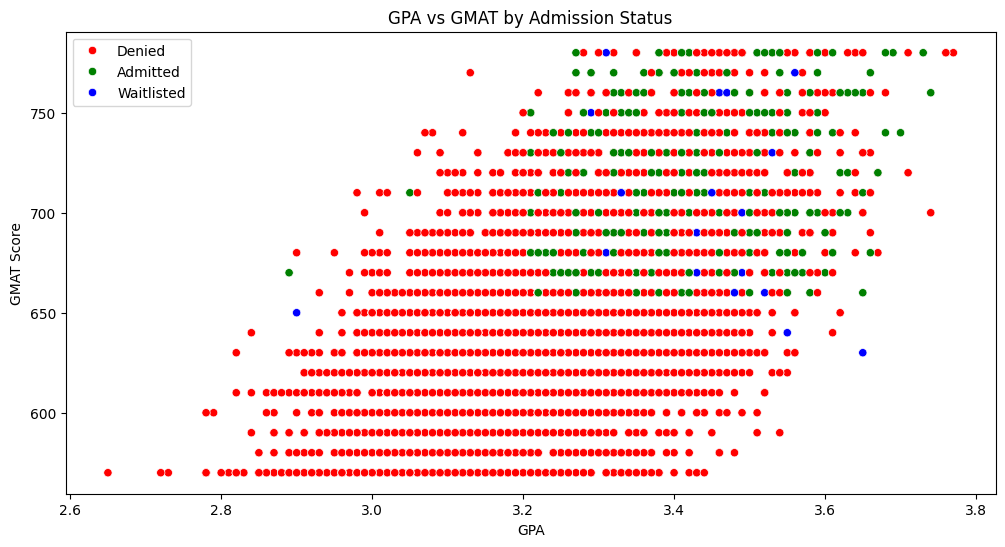

In [25]:
#GPA vs GMAT with admissions

# Custom colors for 'admission' categories
custom_palette = {0: 'red', 1: 'green', 2: 'blue'}  # Adjust colors as needed

plt.figure(figsize=(12, 6))

# Scatter plot with custom color palette
sns.scatterplot(x='gpa', y='gmat', hue='admission', data=df, palette=custom_palette)

# Customizing the legend labels
plt.legend(title='Admission Status', loc='best')

plt.title('GPA vs GMAT by Admission Status')
plt.xlabel('GPA')
plt.ylabel('GMAT Score')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Denied', 'Admitted', 'Waitlisted'])


plt.show()



- Each point in the scatter plot corresponds to a student in the dataset.
- The color of the points indicates whether the student was addmitted, waitlisted or denied.

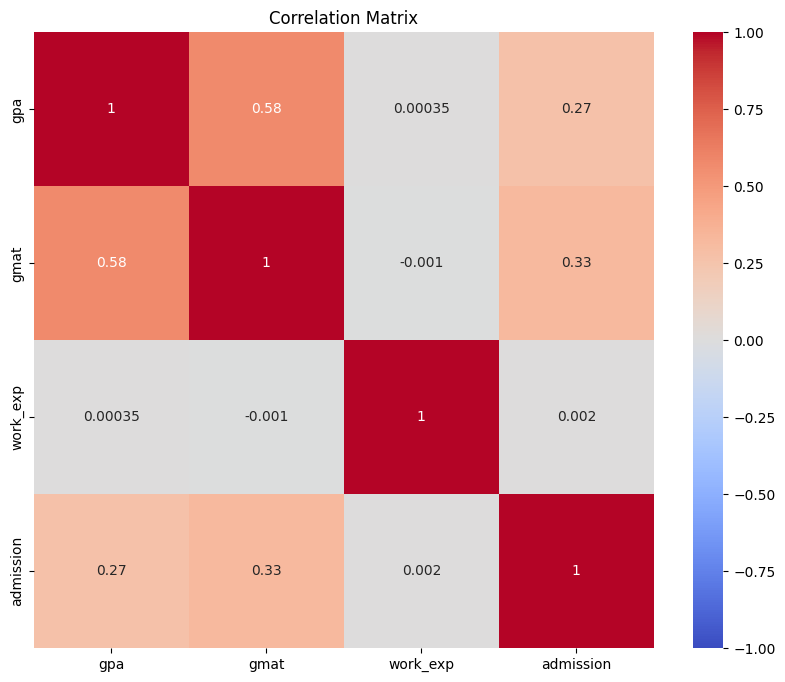

In [26]:
#heatmap
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
correlation_matrix = correlation_matrix.drop('application_id', axis=0).drop('application_id', axis=1)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

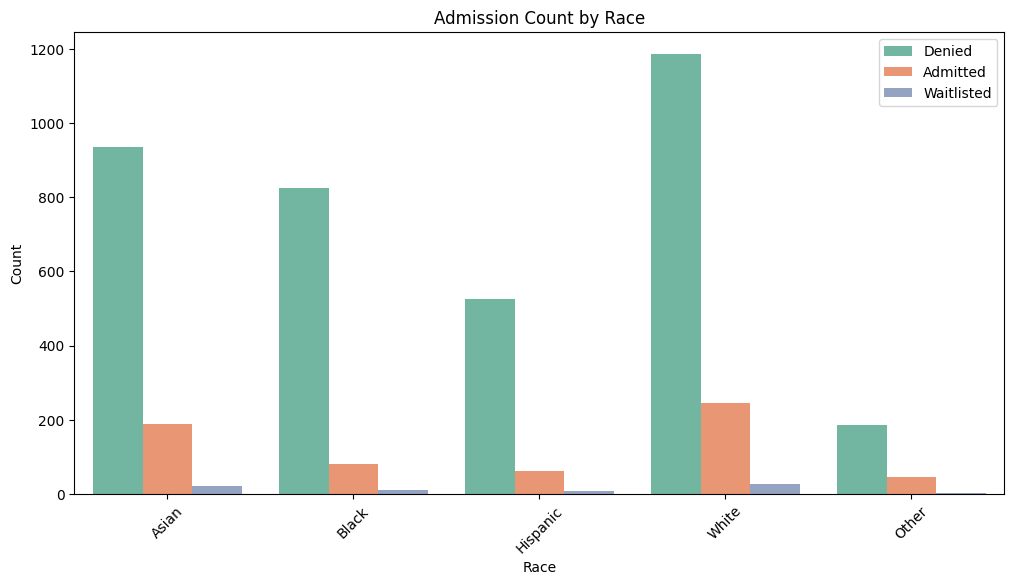

In [27]:
# Race
plt.figure(figsize=(12, 6))
sns.countplot(x='race', hue='admission', data=df, palette='Set2')
plt.title('Admission Count by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(labels=['Denied', 'Admitted', 'Waitlisted'])
plt.show()

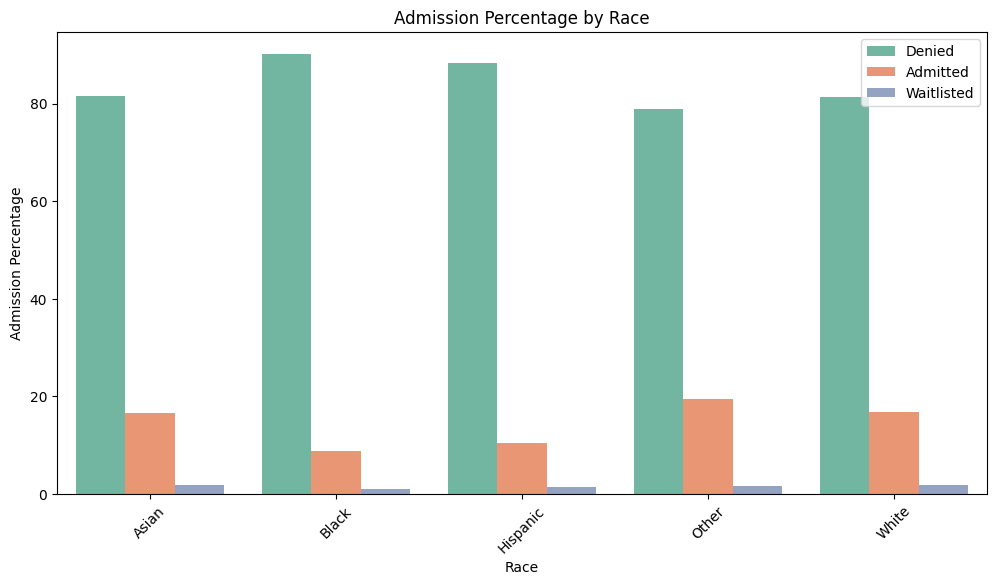

In [28]:
# Group by race and admission to get counts
admission_per_race = df.groupby(['race', 'admission']).size().reset_index(name='count')

# Calculate the total count of each race
race_total = df['race'].value_counts().reset_index(name='total_count')
race_total.columns = ['race', 'total_count']  # Rename columns to match for merging

# Merge the two dataframes on the 'race' column
admission_per_race = pd.merge(admission_per_race, race_total, on='race')

# Calculate the percentage of each admission status for each race
admission_per_race['percentage'] = (admission_per_race['count'] / admission_per_race['total_count']) * 100

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='race', y='percentage', hue='admission', data=admission_per_race, palette='Set2')

# Customize plot
plt.title('Admission Percentage by Race')
plt.xlabel('Race')
plt.ylabel('Admission Percentage')
plt.xticks(rotation=45)

# Manually set legend labels and colors
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Denied', 'Admitted', 'Waitlisted'])

plt.show()



<ipython-input-29-dac24570f597>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=admission_by_race.index, y=admission_by_race.values, palette='Set3')


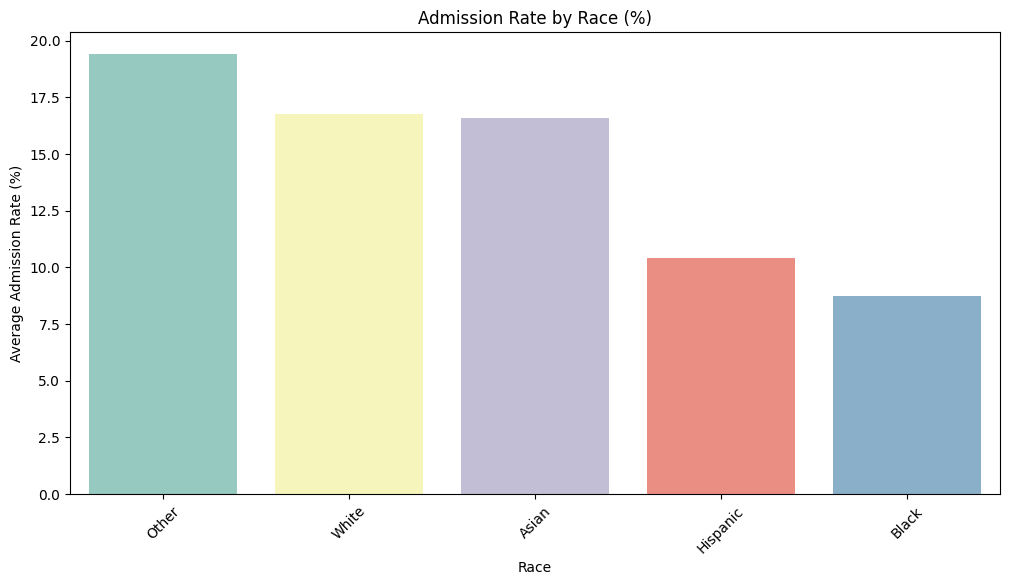

In [29]:
# Create a copy of the admission column and modify it
df['admission_temp'] = df['admission'].replace(2, 0)

# Group by race and calculate the mean of the modified admission column, then convert to percentage
admission_by_race = (df.groupby('race')['admission_temp'].mean() * 100).sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=admission_by_race.index, y=admission_by_race.values, palette='Set3')
plt.title('Admission Rate by Race (%)')
plt.xlabel('Race')
plt.ylabel('Average Admission Rate (%)')  # Note the (%) to indicate percentage
plt.xticks(rotation=45)
plt.show()

# Remove the temporary column
df.drop(columns=['admission_temp'], inplace=True)

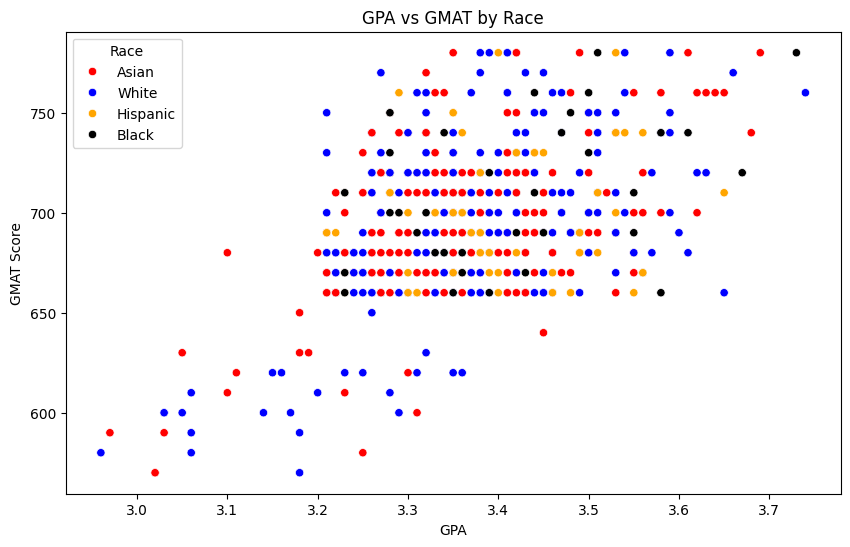

In [30]:
# Filter the dataset for the desired races
filtered_df = df[(df['admission'] == 1) & (df['race'].isin(['Black', 'Hispanic', 'White', 'Asian']))]

# Custom colors for selected races
custom_palette = {'Black': 'black', 'Hispanic': 'orange', 'White': 'blue', 'Asian': 'red'}

plt.figure(figsize=(10, 6))

# Scatter plot with custom color palette
sns.scatterplot(x='gpa', y='gmat', hue='race', data=filtered_df, palette=custom_palette)

# Customizing the legend
plt.legend(title='Race', loc='best')

# Setting the plot title and labels
plt.title('GPA vs GMAT by Race')
plt.xlabel('GPA')
plt.ylabel('GMAT Score')

plt.show()

From the above plot we can see that there is a min value on the GPA and GMAT that you need in order to be admitted as **black** and **hispanic**, while it's not the case as **white** and **asian**.   
Lets explore it a bit more.

In [31]:
# Filter for admitted values and specific races
filtered_df = df[(df['admission'] == 1) & (df['race'].isin(['Black', 'Hispanic', 'White', 'Asian']))]

# Group by race and calculate the mean GMAT and GPA scores
average_scores = filtered_df.groupby('race')[['gmat', 'gpa']].mean()

# Display the results
print(average_scores)

                gmat       gpa
race                          
Asian     694.105263  3.353895
Black     699.000000  3.380625
Hispanic  699.516129  3.397097
White     692.418033  3.358607


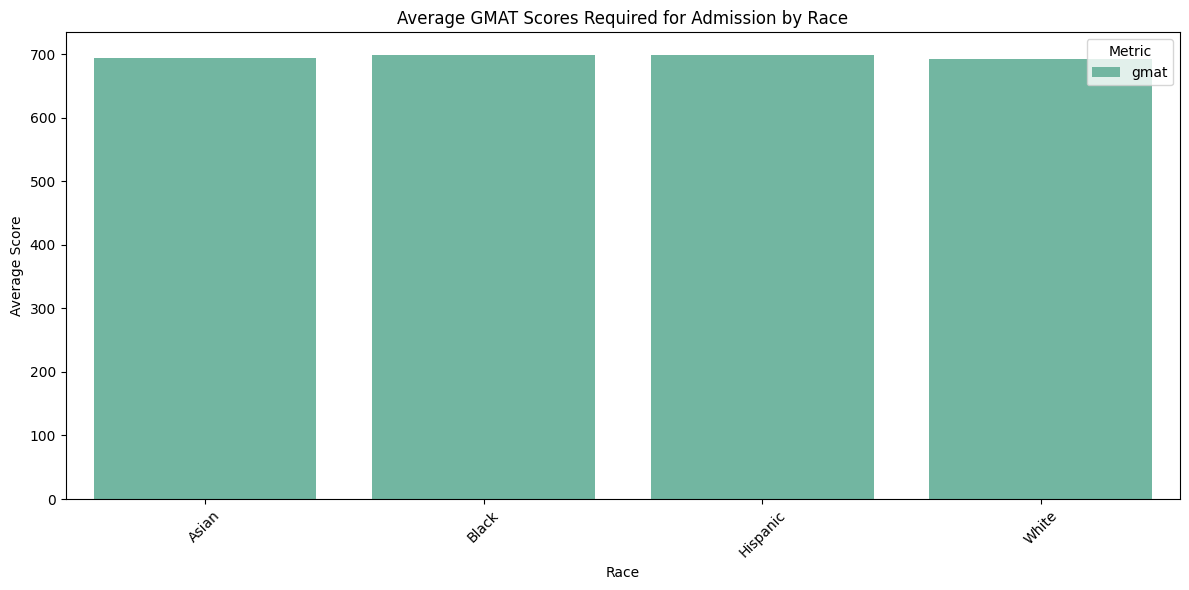

In [32]:
# Group by race and calculate the mean GMAT and GPA scores
average_scores = filtered_df.groupby('race')[['gmat']].mean().reset_index()

# Set up the plot
plt.figure(figsize=(12, 6))

# Bar plot for GMAT and GPA
sns.barplot(data=average_scores.melt(id_vars='race', var_name='Metric', value_name='Score'),
            x='race', y='Score', hue='Metric', palette='Set2')

# Customize the plot
plt.title('Average GMAT Scores Required for Admission by Race')
plt.xlabel('Race')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()

# Show the plot
plt.show()

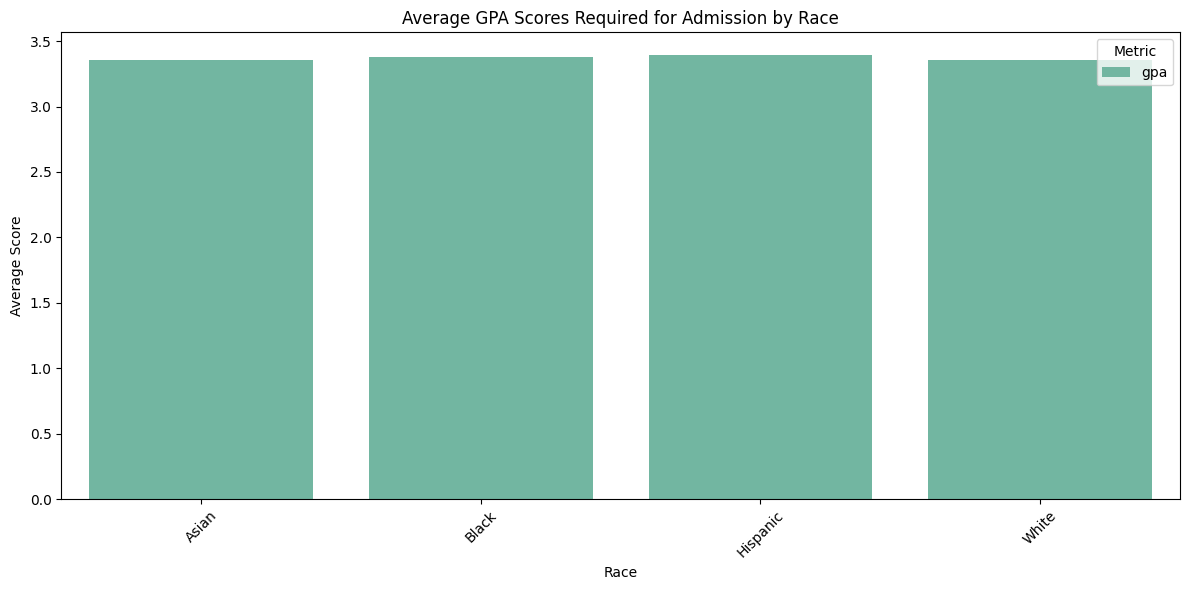

In [33]:
# Group by race and calculate the mean GMAT and GPA scores
average_scores = filtered_df.groupby('race')[['gpa']].mean().reset_index()

# Set up the plot
plt.figure(figsize=(12, 6))

# Bar plot for GMAT and GPA
sns.barplot(data=average_scores.melt(id_vars='race', var_name='Metric', value_name='Score'),
            x='race', y='Score', hue='Metric', palette='Set2')

# Customize the plot
plt.title('Average GPA Scores Required for Admission by Race')
plt.xlabel('Race')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()

# Show the plot
plt.show()

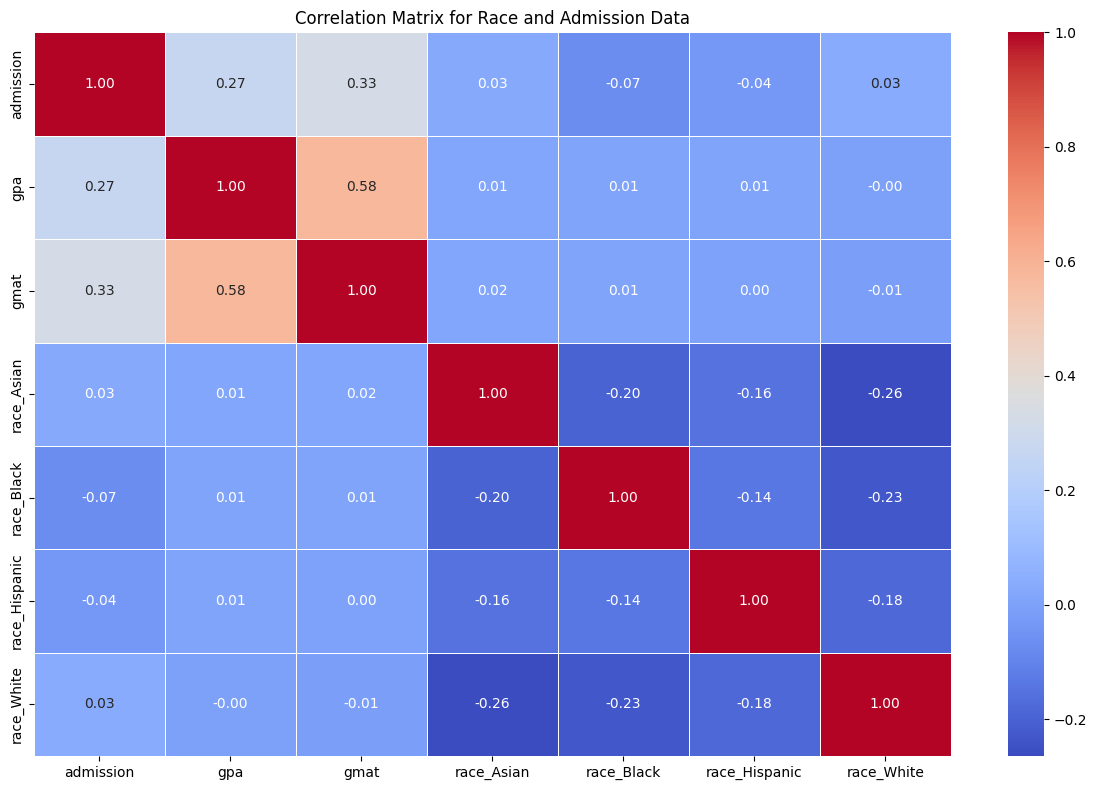

In [34]:
# Create dummy variables for the 'race' column
df_encoded = pd.get_dummies(df, columns=['race'])

# Calculate the correlation matrix
correlation_matrix = df_encoded[['admission', 'gpa', 'gmat', 'race_Asian', 'race_Black', 'race_Hispanic', 'race_White']].corr()
# Set up the plot size
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title and display the plot
plt.title('Correlation Matrix for Race and Admission Data')
plt.tight_layout()
plt.show()

Check if the Admission has any correlation with the Major Degree.

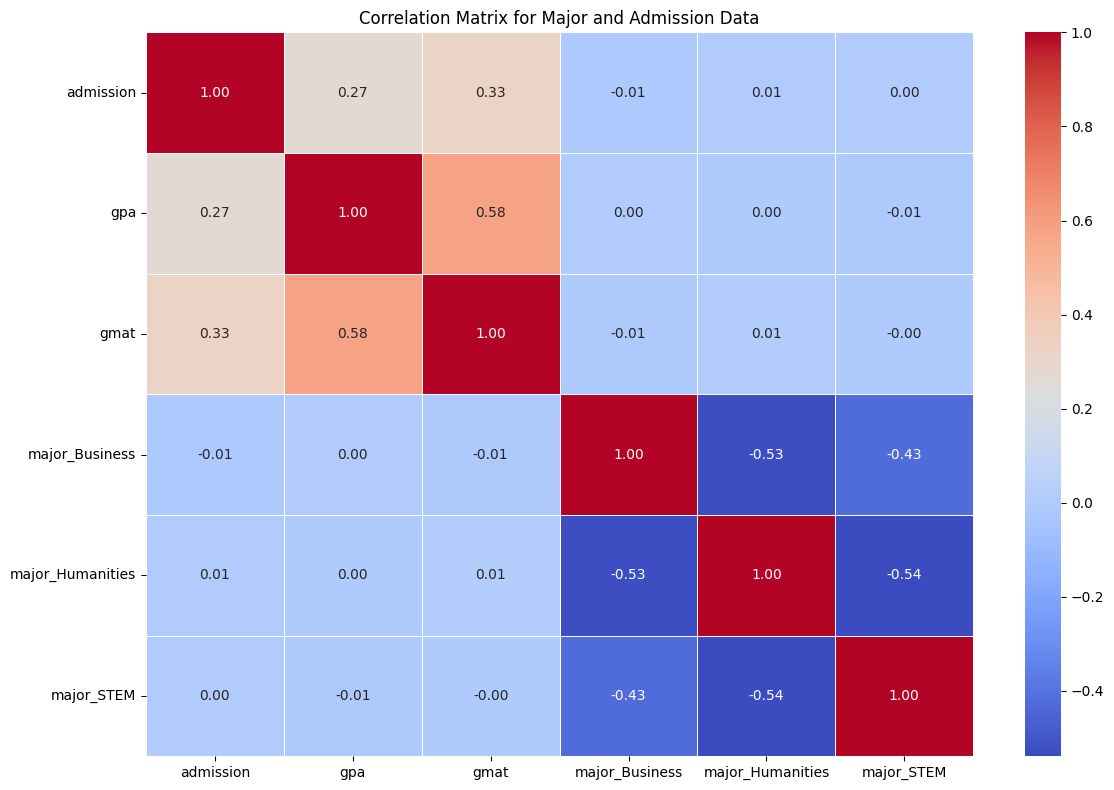

In [35]:
# Create dummy variables for the 'major' column
df_encoded = pd.get_dummies(df, columns=['major'])

# Calculate the correlation matrix
correlation_matrix = df_encoded[['admission', 'gpa', 'gmat', 'major_Business', 'major_Humanities', 'major_STEM']].corr()
# Set up the plot size
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title and display the plot
plt.title('Correlation Matrix for Major and Admission Data')
plt.tight_layout()
plt.show()

Check if the admission has any correlation with the Working Industry.

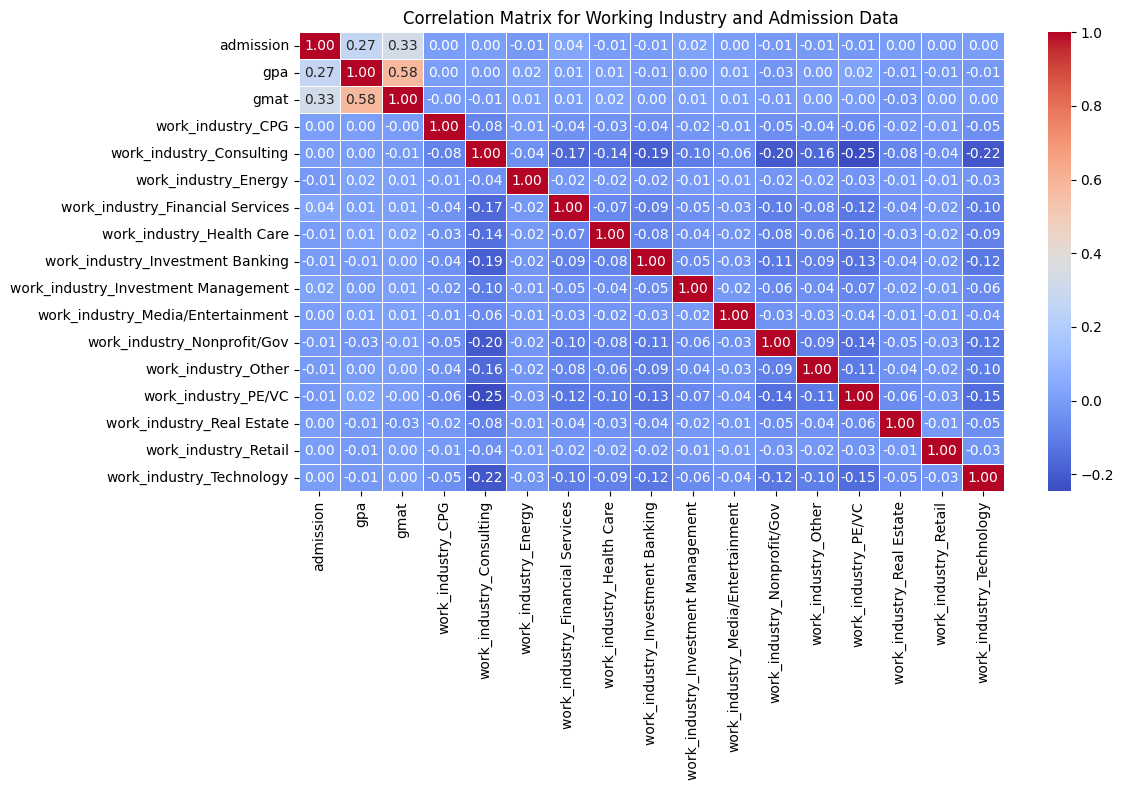

In [36]:
# Create dummy variables for the 'major' column
df_encoded = pd.get_dummies(df, columns=['work_industry'])

# Calculate the correlation matrix
correlation_matrix = df_encoded[['admission', 'gpa', 'gmat', 'work_industry_CPG', 'work_industry_Consulting', 'work_industry_Energy','work_industry_Financial Services','work_industry_Health Care', 'work_industry_Investment Banking',
       'work_industry_Investment Management',
       'work_industry_Media/Entertainment', 'work_industry_Nonprofit/Gov',
       'work_industry_Other', 'work_industry_PE/VC',
       'work_industry_Real Estate', 'work_industry_Retail',
       'work_industry_Technology']].corr()
# Set up the plot size
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title and display the plot
plt.title('Correlation Matrix for Working Industry and Admission Data')
plt.tight_layout()
plt.show()

### For every plot, the question that motivated it and what you learned from it.

## Data Cleaning

### How much missing data

### What's the form of missing data?

### Where's the missing data?


In [37]:
# Count rows with missing data for each column
rows_missing_per_column = df.isnull().sum()

# Display the count of rows with missing data for each column
print("Number of rows with missing data for each column:")
print(rows_missing_per_column)

Number of rows with missing data for each column:
application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission            0
dtype: int64


### What was done about the missing data?

In [38]:
# Fill missing data
df['race'] = df['race'].fillna('Unknown')
df['admission'] = df['admission'].fillna(0)
print(df['admission'].value_counts())

admission
0.0    5194
1.0     900
2.0     100
Name: count, dtype: int64


In [39]:
# Drop unecessary features
df = df.drop(['application_id'], axis=1)
print(df.head(1))

   gender  international  gpa     major   race   gmat  work_exp  \
0  Female          False  3.3  Business  Asian  620.0       3.0   

        work_industry  admission  
0  Financial Services        1.0  


### Handle the rest Data

In [40]:
# Apply one-hot encoding to the categorical columns

# Retrieve again the categorical columns (after handling some of them in previous steps)
object_columns = df.select_dtypes(include=['object']).columns
print("Object columns:", object_columns)

df_encoded = pd.get_dummies(df, columns=object_columns)
df_encoded = df_encoded.astype(int)
df_encoded.head()

print(df_encoded.columns)

Object columns: Index(['gender', 'major', 'race', 'work_industry'], dtype='object')
Index(['international', 'gpa', 'gmat', 'work_exp', 'admission',
       'gender_Female', 'gender_Male', 'major_Business', 'major_Humanities',
       'major_STEM', 'race_Asian', 'race_Black', 'race_Hispanic', 'race_Other',
       'race_Unknown', 'race_White', 'work_industry_CPG',
       'work_industry_Consulting', 'work_industry_Energy',
       'work_industry_Financial Services', 'work_industry_Health Care',
       'work_industry_Investment Banking',
       'work_industry_Investment Management',
       'work_industry_Media/Entertainment', 'work_industry_Nonprofit/Gov',
       'work_industry_Other', 'work_industry_PE/VC',
       'work_industry_Real Estate', 'work_industry_Retail',
       'work_industry_Technology'],
      dtype='object')


Split and Normalize Data

In [41]:
X = df_encoded.drop(columns=['admission'])
print(X.columns)

y= df[['admission']].values

# Normalizing the data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

Index(['international', 'gpa', 'gmat', 'work_exp', 'gender_Female',
       'gender_Male', 'major_Business', 'major_Humanities', 'major_STEM',
       'race_Asian', 'race_Black', 'race_Hispanic', 'race_Other',
       'race_Unknown', 'race_White', 'work_industry_CPG',
       'work_industry_Consulting', 'work_industry_Energy',
       'work_industry_Financial Services', 'work_industry_Health Care',
       'work_industry_Investment Banking',
       'work_industry_Investment Management',
       'work_industry_Media/Entertainment', 'work_industry_Nonprofit/Gov',
       'work_industry_Other', 'work_industry_PE/VC',
       'work_industry_Real Estate', 'work_industry_Retail',
       'work_industry_Technology'],
      dtype='object')


## Propose ML approach

### Spliting Data for training/testing

In [42]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4955, 29) (4955, 1)
Test set: (1239, 29) (1239, 1)


### Why specific algorithm/s?

### Is there something about the data that has driven that decision?


### Use at least 2 algorithms per person with solid alalysis of hyperparameters.

In [43]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0., 1., 2.]), array([4169,  704,   82]))
(array([0., 1., 2.]), array([1025,  196,   18]))


The class 2 (Waitlist) is severely underrepresented. And we have to take measures for that.

Precision: 0.8111
Recall: 0.8111
F1-Score: 0.8111
Accuracy of the default model: 0.8111380145278451


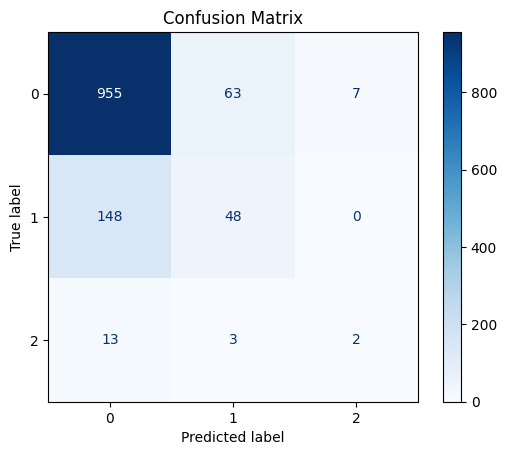

In [46]:
# Angelos:

# Random Forest
rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(X_train, y_train.ravel())

y_pred_rnd = rnd_clf.predict(X_test)

precision = precision_score(y_test.ravel(), y_pred_rnd, average='micro')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test.ravel(), y_pred_rnd, average='micro')

print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred_rnd, average='micro')
print(f"F1-Score: {f1:.4f}")

accuracy_rnd = accuracy_score(y_test.ravel(), y_pred_rnd)
print(f"Accuracy of the default model: {accuracy_rnd}") # Accuracy: 0.8111380145278451

# Compute the confusion matrix
cm = confusion_matrix(y_test.ravel(), y_pred_rnd)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Fold 1
Training class distribution: (array([0., 1., 2.]), array([3921,  707,   79]))
Test class distribution: (array([0., 1., 2.]), array([194,  45,   9]))
--------------------------------------------------
Fold 2
Training class distribution: (array([0., 1., 2.]), array([3908,  719,   80]))
Test class distribution: (array([0., 1., 2.]), array([207,  33,   8]))
--------------------------------------------------
Fold 3
Training class distribution: (array([0., 1., 2.]), array([3905,  715,   87]))
Test class distribution: (array([0., 1., 2.]), array([210,  37,   1]))
--------------------------------------------------
Fold 4
Training class distribution: (array([0., 1., 2.]), array([3920,  706,   81]))
Test class distribution: (array([0., 1., 2.]), array([195,  46,   7]))
--------------------------------------------------
Fold 5
Training class distribution: (array([0., 1., 2.]), array([3901,  720,   86]))
Test class distribution: (array([0., 1., 2.]), array([214,  32,   2]))
----------------

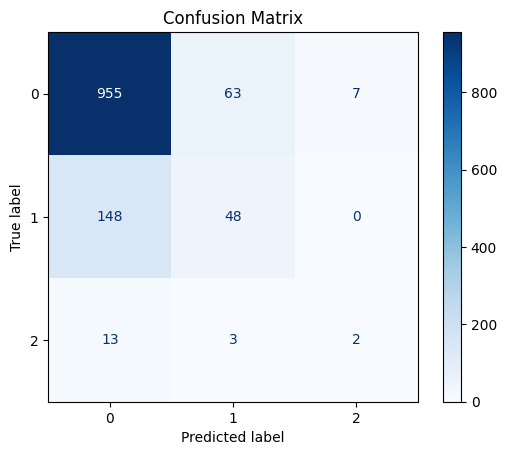

In [49]:
# # Define the stratified K-fold cross-validation
# skf = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

# # Check class distribution in each fold
# for fold, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
#     y_train_fold = y[train_index]
#     y_test_fold = y[test_index]

#     # Print class distribution in each fold
#     print(f"Fold {fold + 1}")
#     print("Training class distribution:", np.unique(y_train_fold, return_counts=True))
#     print("Test class distribution:", np.unique(y_test_fold, return_counts=True))
#     print("-" * 50)

# # Example: Using StratifiedKFold with RandomForestClassifier
# rf_skf = RandomForestClassifier(random_state=42)

# # Stratified K-Fold Cross Validation
# scores = cross_val_score(rf_skf, X_train, y_train.ravel(), cv=skf, scoring='accuracy')
# print("Cross-Validation Scores:", scores)
# print("Mean Cross-Validation Score:", scores.mean())

# # Train the model on the entire training set
# rf_skf.fit(X_train, y_train.ravel())

# # Predict on the test set (X_test)
# y_pred_rf_skf = rf_skf.predict(X_test)

# precision = precision_score(y_test.ravel(), y_pred_rf_skf, average='micro')
# print(f"Precision: {precision:.4f}")

# recall = recall_score(y_test.ravel(), y_pred_rf_skf, average='micro')

# print(f"Recall: {recall:.4f}")

# f1 = f1_score(y_test, y_pred_rf_skf, average='micro')
# print(f"F1-Score: {f1:.4f}")

# # Evaluate accuracy on the test set
# accuracy_test_rf_skf = accuracy_score(y_test.ravel(), y_pred_rf_skf)
# print(f"\nAccuracy on test data after SKF folding: {accuracy_test_rf_skf}") # 0.8111380145278451

# # Compute the confusion matrix
# cm = confusion_matrix(y_test.ravel(), y_pred_rf_skf)

# # Display the confusion matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
# plt.show()

Tune the model:

In [109]:
param_grid = {
    'n_estimators': [75, 100, 125],      # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],     # Maximum depth of the tree
    'min_samples_split': [2, 3, 5],     # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required at a leaf node
}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,                 # 5-fold cross-validation
                           scoring='accuracy',   # Metric to evaluate models
                           verbose=2,            # Print progress to the console
                           n_jobs=-1)            # Use all available processors

grid_search_rf.fit(X_train, y_train.ravel())

print("Best Parameters:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_) # Based on the folds and not on the Test data

best_rf = grid_search_rf.best_estimator_
y_pred = best_rf.predict(X_test)

precision = precision_score(y_test.ravel(), y_pred, average='micro')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test.ravel(), y_pred, average='micro')
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred, average='micro')
print(f"F1-Score: {f1:.4f}")

accuracy_best_rf = accuracy_score(y_test.ravel(), y_pred)
print(f"Accuracy of the default model: {accuracy_best_rf}") # Accuracy: 0.8305084745762712

# Compute the confusion matrix
cm = confusion_matrix(y_test.ravel(), y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8421796165489406
Accuracy of the default model: 0.8305084745762712


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of the default model: 0.8329297820823245


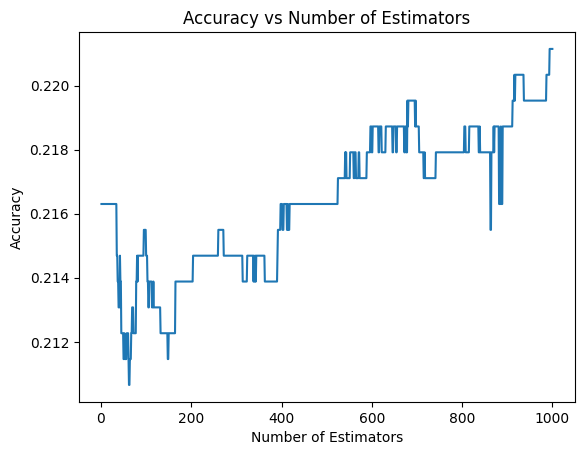

In [77]:
# GradientBoostingClassifier

# Initialize the GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=2, n_estimators=1000, random_state=42)

# Fit the model on the training data
gbc.fit(X_train, y_train.ravel())

# Evaluate accuracy at each stage
errors = [mean_squared_error(y_test.ravel(), y_pred)
          for y_pred in gbc.staged_predict(X_test)]

# Find the best number of estimators
bst_n_estemators = np.argmin(errors) + 1

# Re-train the classifier with the optimal number of estimators
gbrt_best = GradientBoostingClassifier(max_depth = 2, n_estimators = bst_n_estemators, random_state=42)
gbrt_best.fit(X_train, y_train)

y_pred = gbrt_best.predict(X_test)
accuracy = accuracy_score(y_test.ravel(), y_pred)
print(f"Accuracy of the default model: {accuracy}")

plt.plot(range(1, len(errors) + 1), errors)
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Estimators")
plt.show()

In [125]:
# Fine Tune GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42)

param_grid_gbc = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'loss': ['log_loss']
}

# Initialize the GradientBoostingClassifier
grid_search_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid_gbc, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model on the training data
grid_search_gbc.fit(X_train, y_train.ravel())

print("Best Parameters:", grid_search_gbc.best_params_)
print("Best Score:", grid_search_gbc.best_score_)

y_pred = grid_search_gbc.predict(X_test)

accuracy = accuracy_score(y_test.ravel(), y_pred)
print(f"Accuracy of the default model: {accuracy}")


Fitting 5 folds for each of 486 candidates, totalling 2430 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'learning_rate': 0.01, 'loss': 'log_loss', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Best Score: 0.841372351160444
Accuracy of the default model: 0.8272800645682001


## Evaluate Performance

### Why specific metric?

### Are there alternatives?

### Use at least 2 metrics with solid explanation and performance under that metric.

## Present Results.

### Visualize the results.

### Explain plots and results carefully.

### Provide evidence of the results supporting or not supporting the goal.

### Touth on all components in the data science process.

### Did we achieve our goal?

### What we could have done better?

### What else could we do?

### What would be most impactful next step and why?

## Final Report.

### Turn in code and report document (word/pdf).

### Each people should highlight its contribution.